In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.style
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
ec = pd.read_csv('../resources/echo_ann_unique.csv')

In [3]:
ec.head()

,subject_id,hadm_id,age,gender,new_time,icustay_id,first_careunit,intime,outtime,pulmhtn,...,tv_pulm_htn,tv_tr,lv_cavity,lv_diastolic,lv_systolic,lv_wall,rv_cavity,rv_diastolic_fluid,rv_systolic,rv_wall
0,3,145834,76.0,M,2101-10-21 00:41:00,211552,MICU,2101-10-20 19:10:00,2101-10-26 20:43:00,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,145834,76.0,M,2101-10-21 10:30:00,211552,MICU,2101-10-20 19:10:00,2101-10-26 20:43:00,0,...,NaN,NaN,0.0,NaN,3.0,0.0,0.0,NaN,0.0,0.0
2,3,145834,76.0,M,2101-10-21 11:12:00,211552,MICU,2101-10-20 19:10:00,2101-10-26 20:43:00,0,...,NaN,NaN,0.0,NaN,3.0,0.0,0.0,NaN,NaN,0.0
3,4,185777,47.0,F,2191-03-21 13:10:00,294638,MICU,2191-03-16 00:29:00,2191-03-17 16:46:00,0,...,1.0,NaN,0.0,NaN,0.0,0.0,0.0,NaN,0.0,NaN
4,17,161087,47.0,F,2135-05-09 13:02:00,257980,CSRU,2135-05-09 14:12:00,2135-05-10 11:18:00,0,...,NaN,0.0,0.0,NaN,1.0,0.0,0.0,NaN,2.0,NaN


In [4]:
ec.columns

Index([u'subject_id', u'hadm_id', u'age', u'gender', u'new_time',
       u'icustay_id', u'first_careunit', u'intime', u'outtime', u'pulmhtn',
       u'dm', u'esrd', u'isdead', u'age_of_death',
       u'days_after_icu_admit_death', u'days_after_discharge_death', u'status',
       u'tv_pulm_htn', u'tv_tr', u'lv_cavity', u'lv_diastolic', u'lv_systolic',
       u'lv_wall', u'rv_cavity', u'rv_diastolic_fluid', u'rv_systolic',
       u'rv_wall'],
      dtype='object')

In [5]:
len(ec)

32682

In [6]:
## number of echos with a lv diastolic label
len(ec) - np.isnan(ec.lv_diastolic.values).sum()

2817

In [7]:
ec.age_of_death[0]

77.0

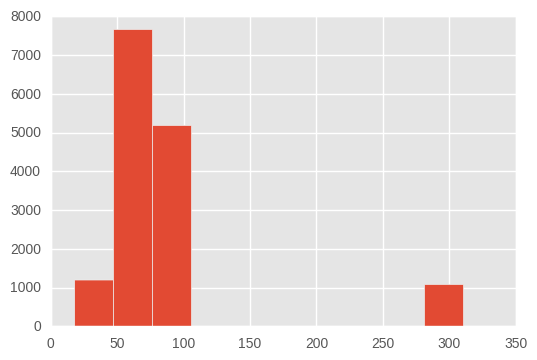

In [8]:
ec.age_of_death.hist()

In [9]:
dead_30_days = ec.days_after_discharge_death <= 30

In [10]:
dead_30_days.sum()

5536

In [11]:
labels = ec.columns.tolist()
labels

['subject_id',
 'hadm_id',
 'age',
 'gender',
 'new_time',
 'icustay_id',
 'first_careunit',
 'intime',
 'outtime',
 'pulmhtn',
 'dm',
 'esrd',
 'isdead',
 'age_of_death',
 'days_after_icu_admit_death',
 'days_after_discharge_death',
 'status',
 'tv_pulm_htn',
 'tv_tr',
 'lv_cavity',
 'lv_diastolic',
 'lv_systolic',
 'lv_wall',
 'rv_cavity',
 'rv_diastolic_fluid',
 'rv_systolic',
 'rv_wall']

In [12]:
features = [x for x in labels]
features.remove('subject_id')
features.remove('hadm_id')
features.remove('new_time')
features.remove('icustay_id')
features.remove('first_careunit')
features.remove('intime')
features.remove('outtime')
features.remove('isdead')
features.remove('age_of_death')
features.remove('days_after_icu_admit_death')
features.remove('days_after_discharge_death')
features.remove('status')

In [13]:
features_df = ec[features]
features_df['gender'] = (features_df.gender == 'M').astype(int)

/home/tbepler/miniconda2/envs/mimiciii/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [14]:
features_df.head()

,age,gender,pulmhtn,dm,esrd,tv_pulm_htn,tv_tr,lv_cavity,lv_diastolic,lv_systolic,lv_wall,rv_cavity,rv_diastolic_fluid,rv_systolic,rv_wall
0,76.0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,76.0,1,0,0,0,NaN,NaN,0.0,NaN,3.0,0.0,0.0,NaN,0.0,0.0
2,76.0,1,0,0,0,NaN,NaN,0.0,NaN,3.0,0.0,0.0,NaN,NaN,0.0
3,47.0,0,0,0,0,1.0,NaN,0.0,NaN,0.0,0.0,0.0,NaN,0.0,NaN
4,47.0,0,0,0,0,NaN,0.0,0.0,NaN,1.0,0.0,0.0,NaN,2.0,NaN


In [15]:
features_df.fillna(-2, inplace=True)
features_df.head()

/home/tbepler/miniconda2/envs/mimiciii/lib/python2.7/site-packages/pandas/core/frame.py:2762: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


,age,gender,pulmhtn,dm,esrd,tv_pulm_htn,tv_tr,lv_cavity,lv_diastolic,lv_systolic,lv_wall,rv_cavity,rv_diastolic_fluid,rv_systolic,rv_wall
0,76.0,1,0,0,0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
1,76.0,1,0,0,0,-2.0,-2.0,0.0,-2.0,3.0,0.0,0.0,-2.0,0.0,0.0
2,76.0,1,0,0,0,-2.0,-2.0,0.0,-2.0,3.0,0.0,0.0,-2.0,-2.0,0.0
3,47.0,0,0,0,0,1.0,-2.0,0.0,-2.0,0.0,0.0,0.0,-2.0,0.0,-2.0
4,47.0,0,0,0,0,-2.0,0.0,0.0,-2.0,1.0,0.0,0.0,-2.0,2.0,-2.0


In [16]:
features_categorical = [x for x in features]
features_categorical.remove('age')

In [17]:
features_dummy = pd.get_dummies(features_df, columns=features_categorical)
features_dummy.head()

,age,gender_0,gender_1,pulmhtn_0,pulmhtn_1,dm_0,dm_1,esrd_0,esrd_1,tv_pulm_htn_-50.0,...,rv_diastolic_fluid_1.0,rv_systolic_-50.0,rv_systolic_-2.0,rv_systolic_0.0,rv_systolic_1.0,rv_systolic_2.0,rv_systolic_3.0,rv_wall_-2.0,rv_wall_0.0,rv_wall_1.0
0,76.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,76.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,76.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,47.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,47.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [18]:
I = np.random.permutation(len(features_dummy))
train_x = features_dummy.iloc[I].iloc[:25000]
train_y = dead_30_days.iloc[I].iloc[:25000]
valid_x = features_dummy.iloc[I].iloc[25000:]
valid_y = dead_30_days.iloc[I].iloc[25000:]

In [19]:
train_y.sum()/float(len(train_y))

0.16891999999999999

In [20]:
valid_y.sum()/float(len(valid_y))

0.17091903150221296

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rf = RandomForestClassifier(oob_score=True, n_estimators=1, max_features='auto')
rf.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

In [67]:
rf.oob_score_

0.79767999999999994

In [68]:
rf.score(train_x, train_y)

0.88971999999999996

In [69]:
rf.score(valid_x, valid_y)

0.74069252798750329

In [48]:
dead_30_days.sum()/float(len(dead_30_days))

0.16938987822042714

In [49]:
rf.feature_importances_

array([  3.71168893e-01,   1.88707220e-02,   1.73480311e-02,
         1.26246072e-02,   1.25076779e-02,   2.07500457e-02,
         2.20417469e-02,   6.75967368e-03,   6.74798064e-03,
         3.58348866e-05,   1.38254849e-02,   1.03545062e-02,
         1.21702790e-02,   1.25290706e-02,   5.98190605e-03,
         2.79689355e-03,   1.49533818e-02,   1.62248906e-02,
         1.62846291e-02,   1.31921364e-02,   1.09135318e-02,
         3.87703856e-04,   1.38363550e-02,   8.88399466e-03,
         1.94418933e-02,   8.05536930e-03,   7.02058665e-03,
         2.69443932e-03,   1.19372850e-04,   1.06311717e-02,
         4.73449044e-03,   7.78256421e-03,   3.41977698e-03,
         1.92069712e-02,   1.14883957e-02,   2.22914933e-02,
         1.50059492e-02,   1.23204019e-02,   1.41149808e-02,
         6.30250768e-04,   1.57791894e-02,   2.17169838e-02,
         2.08554506e-02,   8.50390753e-03,   3.39383070e-03,
         6.61931719e-04,   1.19980664e-02,   1.75042504e-03,
         1.67606213e-02,

In [50]:
feat_import = pd.DataFrame(rf.feature_importances_, index=features_dummy.columns)
feat_import.sort_values(0, ascending=False)

,0
age,0.371169
lv_systolic_0.0,0.022291
dm_1,0.022042
lv_wall_0.0,0.021717
lv_wall_1.0,0.020855
dm_0,0.020750
lv_cavity_0.0,0.019442
lv_systolic_-2.0,0.019207
gender_0,0.018871
gender_1,0.017348


In [33]:
rf_age_only = RandomForestClassifier()
rf_age_only.fit(features_df[['age']], dead_30_days)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [34]:
rf_age_only.score(features_df[['age']], dead_30_days)

0.83061012177957283

In [36]:
rf_age_lv_systolic = RandomForestClassifier()
rf_age_lv_systolic.fit(features_df[['age', 'lv_systolic']], dead_30_days)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [37]:
rf_age_lv_systolic.score(features_df[['age', 'lv_systolic']], dead_30_days)

0.83146686249311552

In [38]:
rf_age_lv_systolic.feature_importances_

array([ 0.72666666,  0.27333334])

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

In [72]:
gb = GradientBoostingClassifier()
gb.fit(train_x, train_y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [73]:
gb.score(train_x, train_y)

0.83448

In [74]:
gb.score(valid_x, valid_y)

0.82973184066649308

In [42]:
gb.feature_importances_

array([ 0.18908771,  0.01230571,  0.0293351 ,  0.03263322,  0.04198735,
        0.07704741,  0.10942574,  0.09402415,  0.02885483,  0.13091475,
        0.06445456,  0.04444526,  0.0213466 ,  0.10391748,  0.02022011])

In [43]:
pd.DataFrame(gb.feature_importances_, index=features).sort_values(0, ascending=False)

,0
age,0.189088
lv_systolic,0.130915
tv_tr,0.109426
rv_systolic,0.103917
lv_cavity,0.094024
tv_pulm_htn,0.077047
lv_wall,0.064455
rv_cavity,0.044445
esrd,0.041987
dm,0.032633


In [ ]:
## given pre, in, and post echos
## if EF drops from pre to in, predict whether it recovers in post